# Healthy Life Expectancy Capstone Project

Import Labraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
sns.color_palette("YlOrBr", as_cmap=True)

%matplotlib inline

Read data

In [2]:
# All the tables edited and organzied by excel sheet also.
# data's Year = {1990, 2000,2012,2013}

In [3]:
#Table #1

In [4]:
healthy_life = pd.read_csv('../data/health_life_expectancy.csv')
healthy_life.head()

,GhoCode,GhoDisplay,YearDisplay,RegionDisplay,WorldBankIncomeGroupDisplay,CountryDisplay,SexDisplay,DisplayValue
0,WHOSIS_000015,Life expectancy at age 60 (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,16
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50
3,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,17
4,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Male,15


In [5]:
healthy_life.shape

(6408, 8)

Rename columns

In [6]:
healthy_life = healthy_life.rename(columns = {'GhoCode':'GhoCode','GhoDisplay':'Gho',
                                              'YearDisplay':'Year','RegionDisplay':'Region',
                                             'WorldBankIncomeGroupDisplay':'IncomeGroup',
                                             'CountryDisplay':'Country','SexDisplay':'Sex',
                                             'DisplayValue':'Value'})
healthy_life.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value
0,WHOSIS_000015,Life expectancy at age 60 (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,16
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50
3,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,17
4,WHOSIS_000015,Life expectancy at age 60 (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Male,15


In [7]:
# lookinge life expectancy and healthy expectancy at birth(years)

In [8]:
healthy_life = healthy_life.loc[~(healthy_life['Gho'] == 'Life expectancy at age 60 (years)')]
healthy_life
                 

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50
5,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,49
6,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61
7,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,45
...,...,...,...,...,...,...,...,...
6403,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Zimbabwe,Male,37
6404,WHOSIS_000001,Life expectancy at birth (years),2012,Africa,Low_income,Zimbabwe,Both sexes,58
6405,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Africa,Low_income,Zimbabwe,Female,52
6406,WHOSIS_000001,Life expectancy at birth (years),1990,Africa,Low_income,Zimbabwe,Male,60


Create a new columns called Life expectancy and Healthy_Life expectancy from Gho column.

In [9]:
healthy_life['Gho']

1                      Life expectancy at birth (years)
2       Healthy life expectancy (HALE) at birth (years)
5       Healthy life expectancy (HALE) at birth (years)
6                      Life expectancy at birth (years)
7       Healthy life expectancy (HALE) at birth (years)
                             ...                       
6403    Healthy life expectancy (HALE) at birth (years)
6404                   Life expectancy at birth (years)
6405    Healthy life expectancy (HALE) at birth (years)
6406                   Life expectancy at birth (years)
6407                   Life expectancy at birth (years)
Name: Gho, Length: 4080, dtype: object

In [10]:
healthy_life['Life expectancy'] = np.where(healthy_life['Gho']=='Life expectancy at birth (years)',
                                                            healthy_life['Value'] , np.nan)

healthy_life['Healthy_Life expectancy'] = np.where(healthy_life['Gho']=='Healthy life expectancy (HALE) at birth (years)',
                                                                    healthy_life['Value'] , np.nan)

In [11]:
healthy_life.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50,NaN,50.0
5,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,49,NaN,49.0
6,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61,61.0,NaN
7,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Female,45,NaN,45.0


In [12]:
#Table #2 

In [13]:
expenditure = pd.read_csv('../data/healthy-life-health-expenditure-per-capita.csv')
expenditure.head()

,Entity,Year,"Current health expenditure per capita, PPP (current international $)",Population (historical estimates)
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1990,NaN,10694804.0
2,Afghanistan,1991,NaN,10745168.0
3,Afghanistan,1992,NaN,12057436.0
4,Afghanistan,1993,NaN,14003764.0


In [14]:
# Rename columns
expenditure = expenditure.rename(columns = {'Entity':'Entity','Year':'Year','Current health expenditure per capita, PPP (current international $)':
                                           'PPP','Population (historical estimates)':'Population'})
expenditure.head()         

,Entity,Year,PPP,Population
0,Abkhazia,2015,NaN,NaN
1,Afghanistan,1990,NaN,10694804.0
2,Afghanistan,1991,NaN,10745168.0
3,Afghanistan,1992,NaN,12057436.0
4,Afghanistan,1993,NaN,14003764.0


In [15]:
# select years 1990,2000,2012,2013
expenditure = expenditure.loc[(expenditure['Year'] ==1990)|(expenditure['Year'] ==2000)|
                              (expenditure['Year'] ==2012)|(expenditure['Year']==2013)]
expenditure

,Entity,Year,PPP,Population
1,Afghanistan,1990,NaN,10694804.0
11,Afghanistan,2000,NaN,19542986.0
23,Afghanistan,2012,151.91798,30466484.0
24,Afghanistan,2013,174.05948,31541216.0
487,Africa,1990,NaN,638157571.0
...,...,...,...,...
58774,Zambia,2013,167.88058,15234976.0
59011,Zimbabwe,1990,NaN,10113899.0
59021,Zimbabwe,2000,NaN,11834679.0
59033,Zimbabwe,2012,164.37645,13265331.0


In [16]:
expenditure[expenditure['Entity']=='United States'].value_counts()

Entity         Year  PPP       Population 
United States  2000  4543.436  282398560.0    1
               2012  8342.580  316651328.0    1
               2013  8522.126  319375168.0    1
Name: count, dtype: int64

In [17]:
expenditure[expenditure['Entity']=='United States of America'].value_counts()

Series([], Name: count, dtype: int64)

In [18]:
expenditure['Entity'] = expenditure.Entity.replace({'United States':'United States of America'})
expenditure

,Entity,Year,PPP,Population
1,Afghanistan,1990,NaN,10694804.0
11,Afghanistan,2000,NaN,19542986.0
23,Afghanistan,2012,151.91798,30466484.0
24,Afghanistan,2013,174.05948,31541216.0
487,Africa,1990,NaN,638157571.0
...,...,...,...,...
58774,Zambia,2013,167.88058,15234976.0
59011,Zimbabwe,1990,NaN,10113899.0
59021,Zimbabwe,2000,NaN,11834679.0
59033,Zimbabwe,2012,164.37645,13265331.0


In [19]:
# Table #3 

In [20]:
# data took on Adults only.
bmi = pd.read_csv('../data/bmi_age_standardised_country.csv')
bmi.head()

,Country/Region/World,Sex,Year,Mean BMI
0,Afghanistan,Men,1975,18.999440
1,Afghanistan,Men,1976,19.105518
2,Afghanistan,Men,1977,19.212080
3,Afghanistan,Men,1978,19.319053
4,Afghanistan,Men,1979,19.425952


In [21]:
# rename columns
bmi = bmi.rename(columns = {'Country/Region/World':'Country','Sex':'Sex','Year':'Year','Mean BMI':'BMI'})
bmi.head()

,Country,Sex,Year,BMI
0,Afghanistan,Men,1975,18.999440
1,Afghanistan,Men,1976,19.105518
2,Afghanistan,Men,1977,19.212080
3,Afghanistan,Men,1978,19.319053
4,Afghanistan,Men,1979,19.425952


In [22]:
bmi = bmi.loc[(bmi['Year'] ==1990)|(bmi['Year'] ==2000)|
             (bmi['Year'] ==2012)|(bmi['Year']==2013)]
bmi.head()

,Country,Sex,Year,BMI
15,Afghanistan,Men,1990,20.502805
25,Afghanistan,Men,2000,21.369506
37,Afghanistan,Men,2012,22.343871
38,Afghanistan,Men,2013,22.427785
57,Albania,Men,1990,24.818641


In [23]:
bmi['Sex']= bmi.Sex.replace({'Men':'Male','Women':'Female'})
bmi.head()

,Country,Sex,Year,BMI
15,Afghanistan,Male,1990,20.502805
25,Afghanistan,Male,2000,21.369506
37,Afghanistan,Male,2012,22.343871
38,Afghanistan,Male,2013,22.427785
57,Albania,Male,1990,24.818641


Combine table#1 and table #2

In [24]:
#df = pd.merge(df1,df2)

In [25]:
healthy_life.head(1)

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy
1,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61,61.0,NaN


In [26]:
expenditure.head(1)

,Entity,Year,PPP,Population
1,Afghanistan,1990,NaN,10694804.0


In [27]:
expectancy_expenditure = pd.merge(healthy_life,expenditure,left_on = ['Country','Year'], right_on = ['Entity','Year'],how ='outer')
expectancy_expenditure.head(2)

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0


In [28]:
# Combine expectancy_expenditure and BMI (table #3)

In [29]:
bmi.head(1)

,Country,Sex,Year,BMI
15,Afghanistan,Male,1990,20.502805


In [30]:
combine = pd.merge(expectancy_expenditure, bmi,left_on = ['Country','Year','Sex'], right_on = ['Country','Year','Sex'], how ='outer')
combine.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,22.427785
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Male,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,22.427785
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,23.851327
3,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Female,62.0,62.0,NaN,Afghanistan,174.05948,31541216.0,23.851327
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,NaN


In [31]:
combine['Country']

0          Afghanistan
1          Afghanistan
2          Afghanistan
3          Afghanistan
4          Afghanistan
             ...      
4749    United Kingdom
4750         Venezuela
4751         Venezuela
4752         Venezuela
4753         Venezuela
Name: Country, Length: 4754, dtype: object

In [32]:
combine['Entity']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
4749            NaN
4750            NaN
4751            NaN
4752            NaN
4753            NaN
Name: Entity, Length: 4754, dtype: object

In [33]:
incomplete_data = combine[4080:]
incomplete_data

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
4080,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa,NaN,638157571.0,NaN
4081,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Africa (UN),NaN,638157248.0,NaN
4082,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Samoa,NaN,47841.0,NaN
4083,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Anguilla,NaN,8340.0,NaN
4084,NaN,NaN,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Aruba,NaN,65734.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4749,NaN,NaN,2013,NaN,NaN,United Kingdom,Female,NaN,NaN,NaN,NaN,NaN,NaN,27.056389
4750,NaN,NaN,1990,NaN,NaN,Venezuela,Female,NaN,NaN,NaN,NaN,NaN,NaN,25.637039
4751,NaN,NaN,2000,NaN,NaN,Venezuela,Female,NaN,NaN,NaN,NaN,NaN,NaN,26.469993
4752,NaN,NaN,2012,NaN,NaN,Venezuela,Female,NaN,NaN,NaN,NaN,NaN,NaN,26.843576


In [34]:
# to delete all incomplete values from the bottom
combine_df = combine.iloc[:-674]
combine_df.head(1)

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,22.427785


# Data cleaning

In [35]:
combine_df.shape

(4080, 14)

In [36]:
#Identify missing/null values

combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4754 entries, 0 to 4753
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   GhoCode                  4080 non-null   object 
 1   Gho                      4080 non-null   object 
 2   Year                     4754 non-null   int64  
 3   Region                   4080 non-null   object 
 4   IncomeGroup              3498 non-null   object 
 5   Country                  4264 non-null   object 
 6   Sex                      4264 non-null   object 
 7   Value                    4080 non-null   float64
 8   Life expectancy          2328 non-null   float64
 9   Healthy_Life expectancy  1752 non-null   float64
 10  Entity                   4108 non-null   object 
 11  PPP                      3091 non-null   float64
 12  Population               3964 non-null   float64
 13  BMI                      2662 non-null   float64
dtypes: float64(6), int64(1),

In [37]:
# keep all the null values.

Checking duplicates

In [38]:
duplicate_all = combine.duplicated().any()
duplicate_all

False

In [39]:
# I dont have any duplicate values

checking the data types

In [40]:
combine.dtypes

GhoCode                     object
Gho                         object
Year                         int64
Region                      object
IncomeGroup                 object
Country                     object
Sex                         object
Value                      float64
Life expectancy            float64
Healthy_Life expectancy    float64
Entity                      object
PPP                        float64
Population                 float64
BMI                        float64
dtype: object

In [41]:
# All columns have in the right format.

Checking if there is any Outlier.

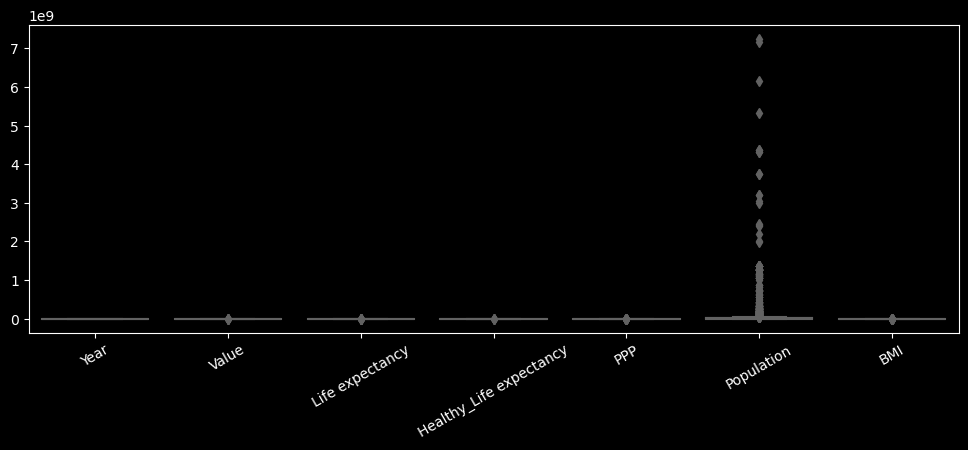

In [42]:
# Box plot can tell me whether I have an outlier or not

plt.figure(figsize = (12,4))
sns.boxplot(combine)
plt.xticks(rotation=30);

    So population have alot of high_outlier, I use IQR method to look at all the outliers.

In [43]:
combine_desc = combine.describe().round(3)
combine_desc

,Year,Value,Life expectancy,Healthy_Life expectancy,PPP,Population,BMI
count,4754.000,4080.000,2328.000,1752.000,3091.000,3.964000e+03,2662.000
mean,2005.425,64.909,68.437,60.221,1075.395,5.887292e+07,25.314
std,8.610,10.395,10.053,8.882,1370.937,3.267144e+08,2.719
min,1990.000,33.000,38.000,33.000,6.932,7.690000e+02,18.530
25%,2000.000,58.000,62.000,54.000,158.265,1.193641e+06,23.335
50%,2012.000,66.000,71.000,62.000,522.497,6.114443e+06,25.498
75%,2013.000,73.000,76.000,67.000,1420.101,2.101715e+07,26.866
max,2013.000,87.000,87.000,78.000,8522.126,7.250593e+09,35.177


In [44]:
#high_outlier = (Q3 + 1.5 IQR), IQR = 75% -25%

high_outlier = combine_desc.loc['75%','Population'] + 1.5*(combine_desc.loc['75%', 'Population'] - combine_desc.loc['25%', 'Population'])
high_outlier

50752413.5

In [45]:
all_high_outlier= combine.loc[combine['Population']> high_outlier]
all_high_outlier.head()

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
273,WHOSIS_000001,Life expectancy at birth (years),1990,South_East Asia,Low_income,Bangladesh,Both sexes,60.0,60.0,NaN,Bangladesh,NaN,107147656.0,NaN
274,WHOSIS_000001,Life expectancy at birth (years),1990,South_East Asia,Low_income,Bangladesh,Female,59.0,59.0,NaN,Bangladesh,NaN,107147656.0,18.529762
275,WHOSIS_000001,Life expectancy at birth (years),1990,South_East Asia,Low_income,Bangladesh,Male,60.0,60.0,NaN,Bangladesh,NaN,107147656.0,19.877329
276,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,South_East Asia,Low_income,Bangladesh,Female,62.0,NaN,62.0,Bangladesh,83.44547,154030144.0,21.636754
277,WHOSIS_000001,Life expectancy at birth (years),2013,South_East Asia,NaN,Bangladesh,Female,72.0,72.0,NaN,Bangladesh,83.44547,154030144.0,21.636754


In [46]:
print(len(all_high_outlier))

475


In [47]:
high_outlier

50752413.5

# Exploratory Data Analysis (EDA)

I am looking
 * The distribution of healthy life expectancy and life expectancy through the world.(by country and by income group)
 * Which country has the top life expectancy and healthy life expectancy and which one is the bottom. 
 * How does the number of healthy years lose change overtime?
 * How does healthy life expectancy correlate with life expectancy, health expenditure, BMI and population in different demographic groups such as age, geographical regions and income groups across the world?
 * What is the relationship between healthy life expectancy and BMI through time? Are there any patterns based on different BMI categories, and does it affect by gender?

In [48]:
expectancy_country = combine_df.groupby('Country')[['Life expectancy','Healthy_Life expectancy']].mean().sort_values(by = 'Life expectancy', ascending = False)
expectancy_country

,Life expectancy,Healthy_Life expectancy
Country,,
Japan,81.916667,74.222222
San Marino,81.833333,72.444444
Switzerland,80.916667,71.444444
Iceland,80.666667,71.555556
Australia,80.666667,71.777778
...,...,...
Mozambique,49.333333,44.111111
Central African Republic,48.750000,41.777778
Chad,48.500000,42.555556


Japan has the heighest life expectancy and healthy life expectancy.
Sierra Leone has the lowest life expectancy and healy life expectancy.

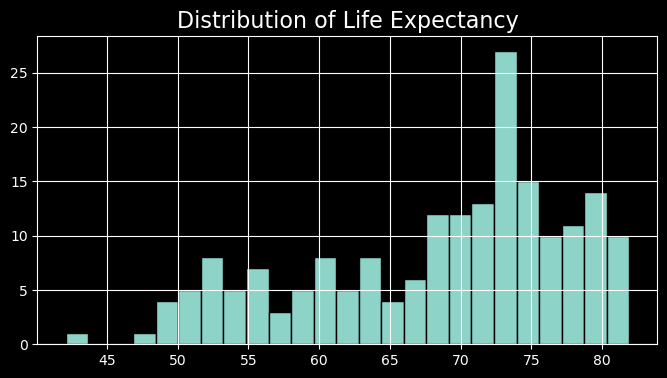

In [49]:
# Distribution of the average life expectancy through the world.
expectancy_country['Life expectancy'].hist(bins = 25,
                            
                            edgecolor = 'black',
                            figsize = (8,4))

plt.title('Distribution of Life Expectancy', fontsize = 16);

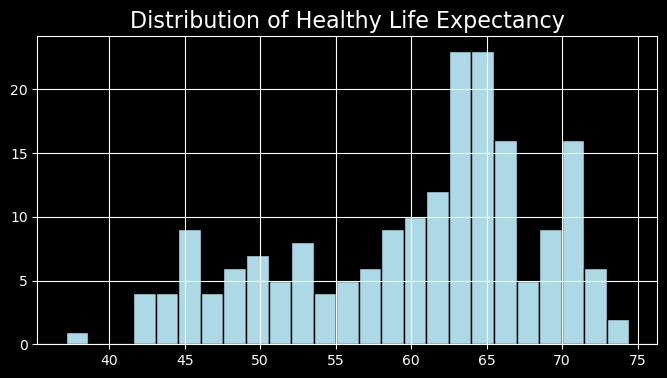

In [50]:
# Distribution of the average health life expectancy through the world.
expectancy_country['Healthy_Life expectancy'].hist(bins = 25,
                            color = 'lightblue',
                            edgecolor = 'black',
                            figsize = (8,4))

plt.title('Distribution of Healthy Life Expectancy', fontsize = 16);

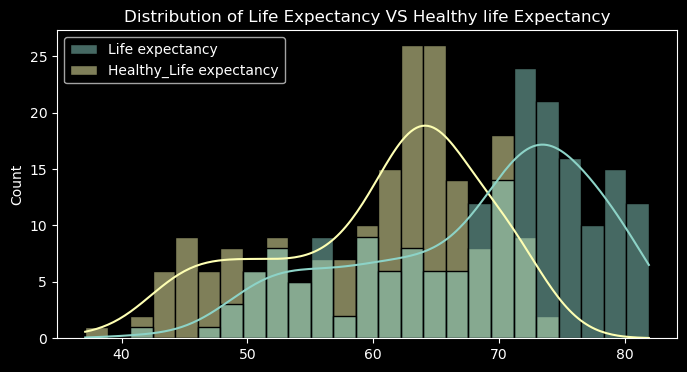

In [51]:
# Distribution of the average life expectancy and average healthy life expectancy through the world.
plt.figure(figsize = (8,4))
sns.histplot(data = expectancy_country, bins = 25,
                            
                            edgecolor = 'black',kde = True)
# kde stands for Kernel Density Estimation, is a method used to visualize the probability distribution of a continuous random variable.
plt.title ('Distribution of Life Expectancy VS Healthy life Expectancy');

Both distribution tables have a negatively skewed data (their mean is less than the median).

Distribution of healthy life expectancy in different income groups

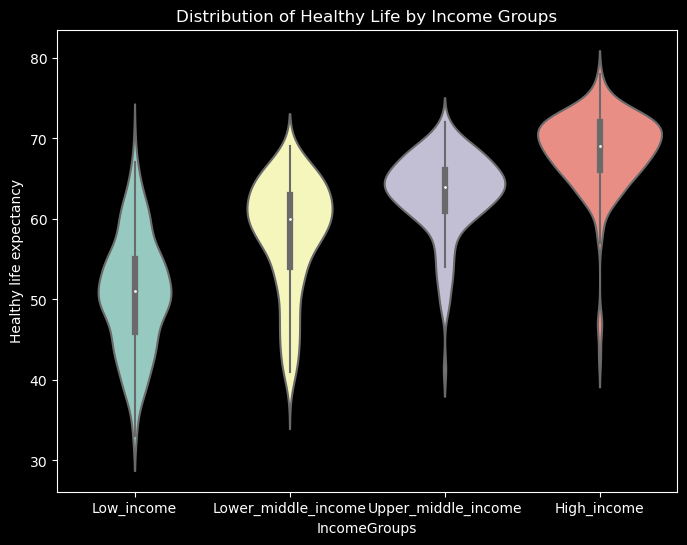

In [52]:
# Violin plot of healthy life expectancy by income groups

plt.figure(figsize = (8, 6))
sns.violinplot(data = combine_df, x = 'IncomeGroup', y = 'Healthy_Life expectancy')
plt.xlabel('IncomeGroups')
plt.ylabel('Healthy life expectancy')
plt.title('Distribution of Healthy Life by Income Groups')
plt.show()

High income groups have high healthy life expectancy. On the otherhand low income groups have low health life expectancy.

In [53]:
# looking top 10 and bottom 10 countries

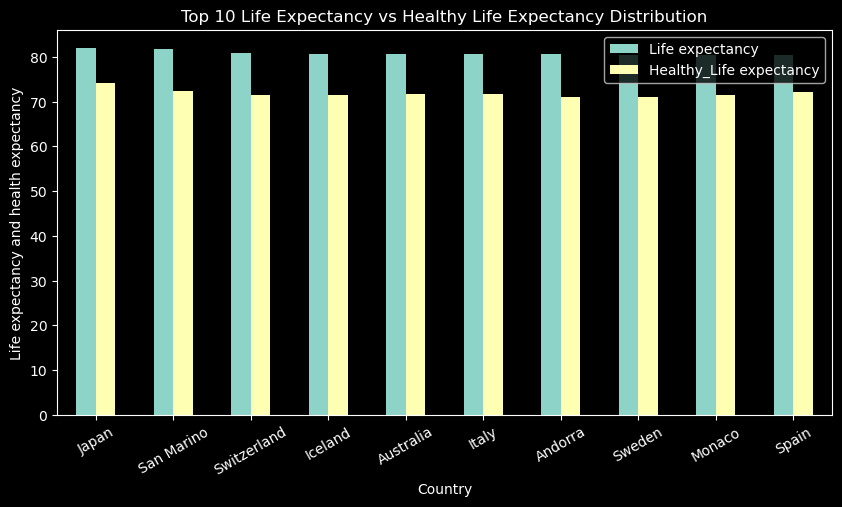

In [54]:
top10 = expectancy_country.head(10)
top10 = top10.plot(kind='bar', figsize=(10, 5))
top10.set_ylabel('Life expectancy and health expectancy')
top10.set_xlabel('Country')
plt.xticks(rotation=30)
plt.title('Top 10 Life Expectancy vs Healthy Life Expectancy Distribution')
plt.show()

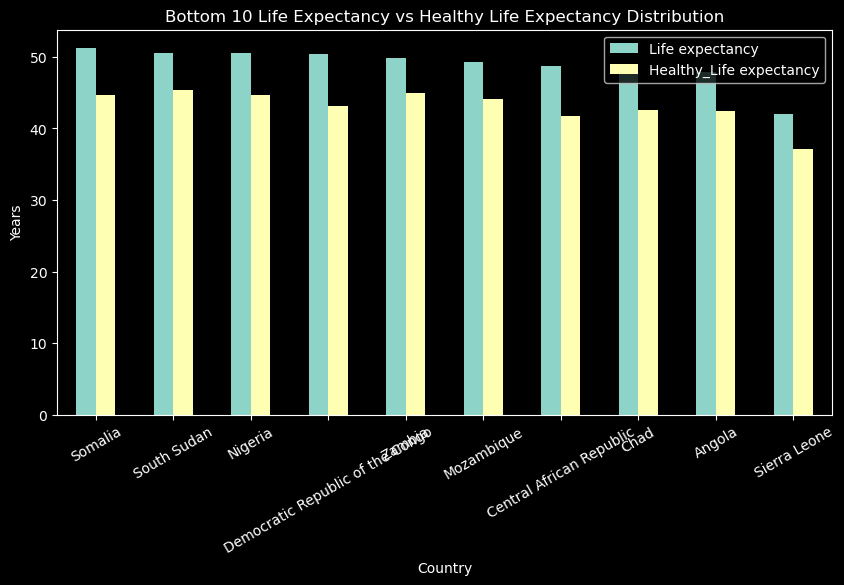

In [55]:
bottom10 = expectancy_country.tail(10)
bottom10 = bottom10.plot(kind='bar', figsize=(10, 5))
bottom10.set_ylabel('Years')
bottom10.set_xlabel('Country')
plt.xticks(rotation=30)
plt.title('Bottom 10 Life Expectancy vs Healthy Life Expectancy Distribution')
plt.show()

Looking trends of life exepctancy and healthy life expectancy through time.

In [56]:
expectancy_year = combine_df.groupby('Year')[['Life expectancy','Healthy_Life expectancy']].mean()
expectancy_year.head()

,Life expectancy,Healthy_Life expectancy
Year,,
1990,65.097938,NaN
2000,66.747423,57.827350
2012,70.807560,61.235897
2013,71.096220,61.606529


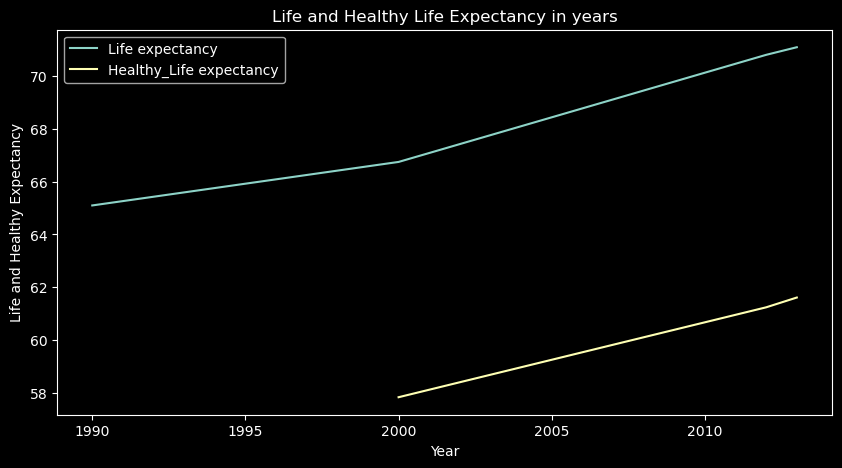

In [57]:
plt.figure(figsize=(10,5))

expectancy_year['Life expectancy'].plot(kind='line', legend=True)
expectancy_year['Healthy_Life expectancy'].plot(kind='line', legend=True)
plt.title('Life and Healthy Life Expectancy in years')
plt.xlabel('Year')
plt.ylabel('Life and Healthy Expectancy')
plt.show()

AS the year in progress, life expectancy and health expectancy are increasing.

The line graph showed me there is no data of health life expectancy in 1900's. Let me check it.

In [58]:
df = combine_df.loc[combine_df['Year']== 1990]
df.head(3)

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
18,WHOSIS_000001,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,49.0,49.0,NaN,Afghanistan,NaN,10694804.0,NaN
19,WHOSIS_000001,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0,50.0,NaN,Afghanistan,NaN,10694804.0,20.866283
20,WHOSIS_000001,Life expectancy at birth (years),1990,Eastern Mediterranean,Low_income,Afghanistan,Male,49.0,49.0,NaN,Afghanistan,NaN,10694804.0,20.502805


How does the number of healthy years lose change overtime?

In [59]:
# I create a new column called healthy year lose dueto disability,illness or any other factors.

In [60]:
expectancy_year['Healthy_Year_lose'] = expectancy_year['Life expectancy'] - expectancy_year['Healthy_Life expectancy']
expectancy_year.reset_index()

,Year,Life expectancy,Healthy_Life expectancy,Healthy_Year_lose
0,1990,65.097938,NaN,NaN
1,2000,66.747423,57.827350,8.920072
2,2012,70.807560,61.235897,9.571663
3,2013,71.096220,61.606529,9.489691


In [61]:
average_healthyyear_loss_trough_lifespan = expectancy_year.Healthy_Year_lose.mean()
average_healthyyear_loss_trough_lifespan

9.327141892090346

The average healthy year lose disability is 9.33 years. The higher life expectancy assocaited with the higher healthy year lose disability.

In [67]:
expectancy_year.iloc[1:].reset_index()

,Year,Life expectancy,Healthy_Life expectancy,Healthy_Year_lose
0,2000,66.747423,57.827350,8.920072
1,2012,70.807560,61.235897,9.571663
2,2013,71.096220,61.606529,9.489691


In [68]:
# Healthy life expectancy by region

In [69]:
import plotly.express as px
px.choropleth(combine_df, locations="Region",
              color="Region",
              hover_name= "BMI",
              animation_frame="Year",
              range_color=[20,20])


How does healthy life expectancy correlate with life expectancy, health expenditure, BMI and population in different demographic groups such as age, geographical regions and income groups across the world?
What is the relationship between healthy life expectancy and BMI through time? Are there any patterns based on different BMI categories, and does it affect by gender?

In [70]:
combine_df.corr(numeric_only=True)

,Year,Value,Life expectancy,Healthy_Life expectancy,PPP,Population,BMI
Year,1.000000,0.101116,0.253904,0.191577,0.198270,0.027472,0.255873
Value,0.101116,1.000000,1.000000,1.000000,0.561370,0.011387,0.500479
Life expectancy,0.253904,1.000000,1.000000,NaN,0.625173,0.009000,0.601253
Healthy_Life expectancy,0.191577,1.000000,NaN,1.000000,0.636731,0.024713,0.539789
PPP,0.198270,0.561370,0.625173,0.636731,1.000000,-0.016554,0.309555
Population,0.027472,0.011387,0.009000,0.024713,-0.016554,1.000000,-0.157477
BMI,0.255873,0.500479,0.601253,0.539789,0.309555,-0.157477,1.000000


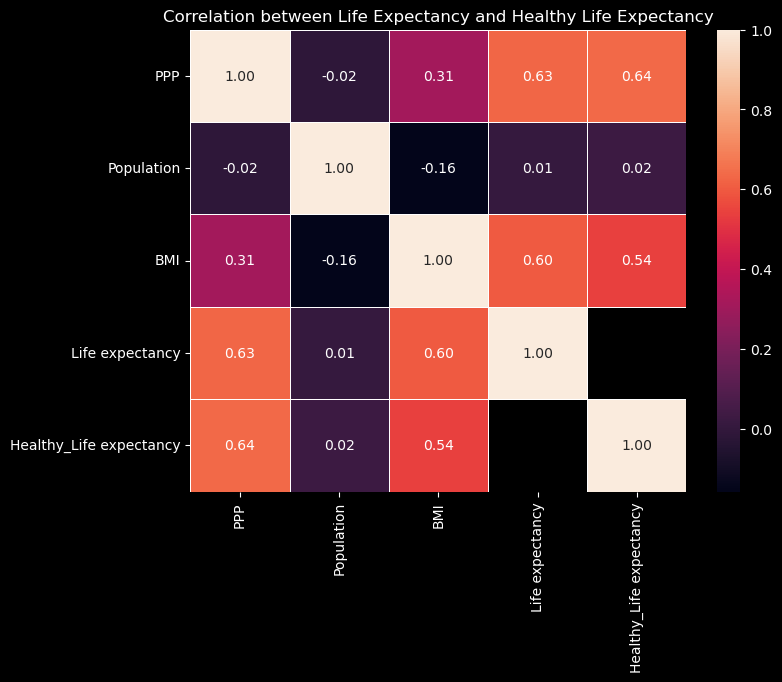

In [71]:
correlation = combine_df[['PPP','Population','BMI','Life expectancy','Healthy_Life expectancy']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6)), sns.color_palette("YlOrBr", as_cmap=True)
sns.heatmap(correlation, annot=True,fmt='.2f', linewidths=0.5)
plt.title('Correlation between Life Expectancy and Healthy Life Expectancy')
plt.show()

From my correlation graph,body mass index(BMI)has apostive correlation with healthy and life expectancy.PPP has a strong postive correlation with healthy life expectancy and life expectancy.
Population has a very week postive correlation.

So let me to explore more about BMI relation to health life expectancy.

let me look at the distribution of BMI globally.

In [72]:
# Body mass index, known as BMI, is often used to diagnose obesity.

In [73]:
# BMI overtime

C:\Users\fozey\AppData\Local\Temp\ipykernel_39556\1293605284.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\fozey\AppData\Local\Temp\ipykernel_39556\1293605284.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\fozey\AppData\Local\Temp\ipykernel_39556\1293605284.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

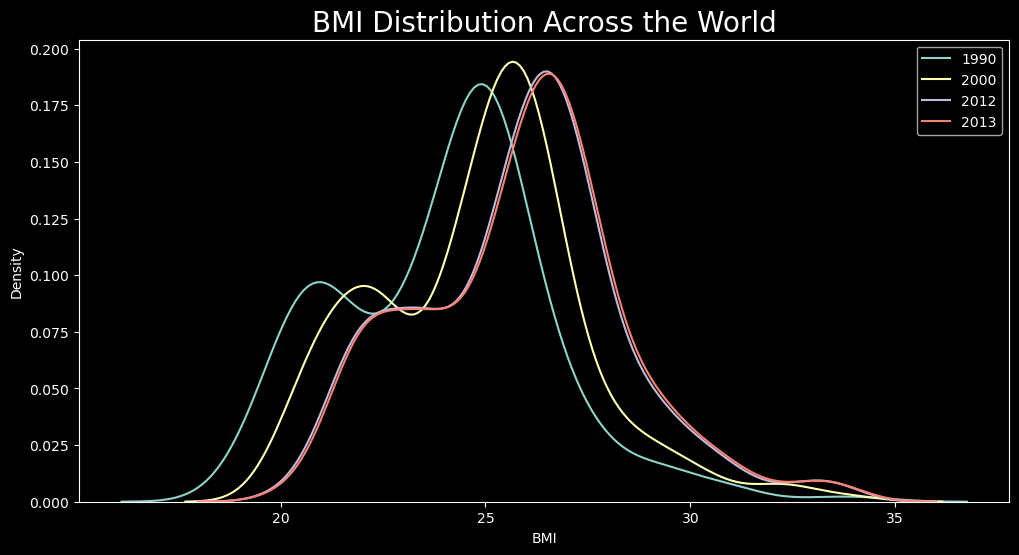

In [74]:
combine_df['Year'] = combine_df['Year'].astype(int)
fig = plt.figure(figsize=(12, 6))

sns.distplot(combine_df[combine_df['Year'] == 1990].BMI, hist=False, label='1990')
sns.distplot(combine_df[combine_df['Year'] == 2000].BMI, hist=False, label='2000')
sns.distplot(combine_df[combine_df['Year'] == 2012].BMI, hist=False, label='2012')
sns.distplot(combine_df[combine_df['Year'] == 2013].BMI, hist=False, label='2013')

plt.title('BMI Distribution Across the World', size=20)
plt.xlabel('BMI')
plt.legend()

Text(0.5, 1.0, 'Scatter plot of BMI')

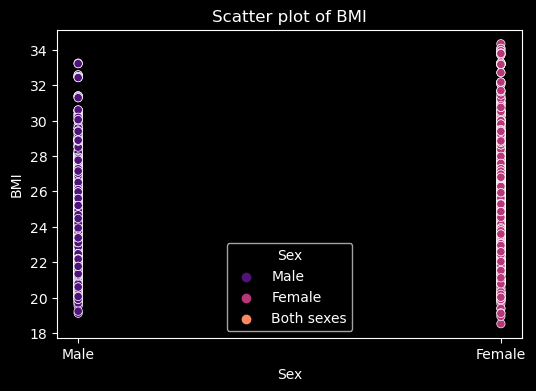

In [75]:
plt.figure(figsize=(6,4))
ax = sns.scatterplot(x=combine_df['Sex'],y=combine_df['BMI'],data=combine_df,palette='magma',hue='Sex')
ax.set_title('Scatter plot of BMI')

From scatter graph, people who have more high bmi are females.

Text(0.5, 1.0, 'Scatter plot of BMI vs Healthy Life Expectancy')

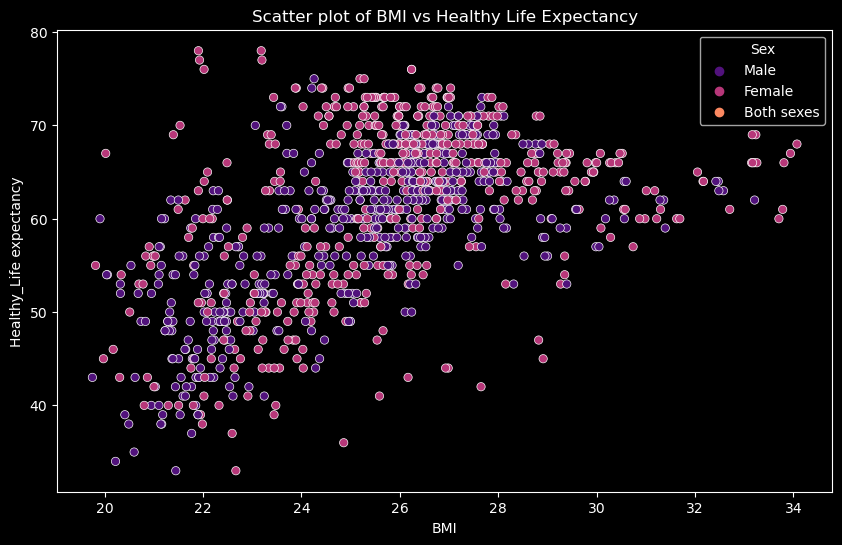

In [76]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x=combine_df['BMI'],y=combine_df['Healthy_Life expectancy'],data=combine_df,palette='magma',hue='Sex')
ax.set_title('Scatter plot of BMI vs Healthy Life Expectancy')

Pepole whose Bmi 

In [78]:
# Add a new column called Status based on BMI weight.

In [79]:
combine_df['BMI'] = combine_df['BMI'].round(1)
combine_df.head()

C:\Users\fozey\AppData\Local\Temp\ipykernel_39556\1691218967.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,22.4
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Male,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,22.4
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,23.9
3,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Female,62.0,62.0,NaN,Afghanistan,174.05948,31541216.0,23.9
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,NaN


In [80]:
for ind, row in combine_df.iterrows():
   
    if row['BMI'] < 18.5:
        combine_df.loc[ind, 'Status'] = 'Underweight'
    elif 18.5 <= row['BMI'] <= 24.9:
        combine_df.loc[ind, 'Status'] = 'Healthy'
    elif 25.0 <= row['BMI'] <= 29.9:
        combine_df.loc[ind, 'Status'] = 'Overweight'
    elif row['BMI'] >= 30:
        combine_df.loc[ind, 'Status'] = 'Obesity'  
    else:
        combine_df.loc[ind, 'Status'] = 'No data'
combine_df.head(20)

C:\Users\fozey\AppData\Local\Temp\ipykernel_39556\509845882.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI,Status
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,22.4,Healthy
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Male,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,22.4,Healthy
2,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Female,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,23.9,Healthy
3,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Female,62.0,62.0,NaN,Afghanistan,174.05948,31541216.0,23.9,Healthy
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,NaN,No data
5,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,NaN,No data
6,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,49.0,NaN,49.0,Afghanistan,151.91798,30466484.0,23.7,Healthy
7,WHOSIS_000001,Life expectancy at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Female,61.0,61.0,NaN,Afghanistan,151.91798,30466484.0,23.7,Healthy
8,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,49.0,NaN,49.0,Afghanistan,151.91798,30466484.0,NaN,No data
9,WHOSIS_000001,Life expectancy at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,60.0,60.0,NaN,Afghanistan,151.91798,30466484.0,NaN,No data


Healthy Life expectancy vs BMI

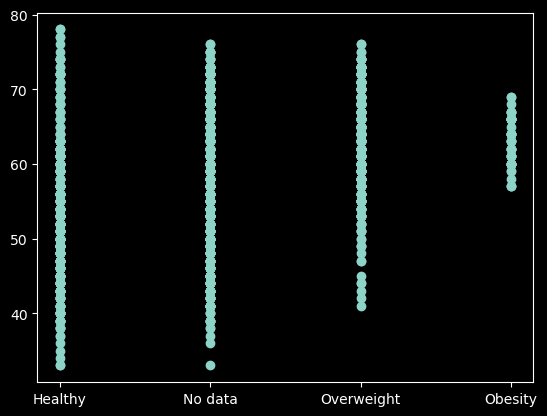

In [81]:
plt.scatter(x = combine_df['Status'],
            y = combine_df['Healthy_Life expectancy'])
plt.xlabel =('BMI')
plt.ylabel =('Healthy life expectancy')
plt.title= ('BMI vs Healthy life expectancy');

There is no people who is underweight.From the scatter graph, people whose BMI status is healthy has higher healthy life expectancy and people who is obesed has lower healthy life expectancy.

In [ ]:
# why I have alot of NO data, because of both sex. I think I have to do some action.......

In [82]:
combine_df[combine_df['Sex'] == 'Both sexes']

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI,Status
4,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Both sexes,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,NaN,No data
5,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,NaN,No data
8,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,49.0,NaN,49.0,Afghanistan,151.91798,30466484.0,NaN,No data
9,WHOSIS_000001,Life expectancy at birth (years),2012,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,60.0,60.0,NaN,Afghanistan,151.91798,30466484.0,NaN,No data
14,WHOSIS_000001,Life expectancy at birth (years),2000,Eastern Mediterranean,Low_income,Afghanistan,Both sexes,55.0,55.0,NaN,Afghanistan,NaN,19542986.0,NaN,No data
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4069,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2012,Africa,Low_income,Zimbabwe,Both sexes,49.0,NaN,49.0,Zimbabwe,164.37645,13265331.0,NaN,No data
4070,WHOSIS_000001,Life expectancy at birth (years),2012,Africa,Low_income,Zimbabwe,Both sexes,58.0,58.0,NaN,Zimbabwe,164.37645,13265331.0,NaN,No data
4071,WHOSIS_000001,Life expectancy at birth (years),1990,Africa,Low_income,Zimbabwe,Both sexes,62.0,62.0,NaN,Zimbabwe,NaN,10113899.0,NaN,No data
4074,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2000,Africa,Low_income,Zimbabwe,Both sexes,37.0,NaN,37.0,Zimbabwe,NaN,11834679.0,NaN,No data


In [83]:
combine_df.head(2)

,GhoCode,Gho,Year,Region,IncomeGroup,Country,Sex,Value,Life expectancy,Healthy_Life expectancy,Entity,PPP,Population,BMI,Status
0,WHOSIS_000001,Life expectancy at birth (years),2013,Eastern Mediterranean,NaN,Afghanistan,Male,61.0,61.0,NaN,Afghanistan,174.05948,31541216.0,22.4,Healthy
1,WHOSIS_000002,Healthy life expectancy (HALE) at birth (years),2013,Eastern Mediterranean,Low_income,Afghanistan,Male,50.0,NaN,50.0,Afghanistan,174.05948,31541216.0,22.4,Healthy


In [84]:
combine_df.to_csv('../data/capstone.csv', index = False)

In [85]:
data1 = combine_df.to_csv('../data/capstone.csv', index = False)
data1

In [86]:
data2 = expectancy_year.to_csv('../data/healthy_lose.csv', index = False)
data2